### AUTHOR : VAISHNAV KRISHNA P
#### TOPIC : MALL CUSTOMER SEGMENTATION
* About dataset : This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

In [54]:
# importing necessory libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# libary for cluster
from sklearn.cluster import KMeans

# removing unnecessory warnings
import warnings
warnings.filterwarnings(action='ignore')

In [55]:
# importing the datset
df = pd.read_csv('/content/Mall_Customers.csv.xls')

In [56]:
# first five rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [57]:
# shape of the dataframe
df.shape

(200, 5)

In [58]:
# information about the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### MISSING VALUE ANALYSIS

In [59]:
# code for counting the number of missing value in each feature
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [60]:
# chosssing the Annual income and spending Score based
X = df.iloc[:,[3,4]].values

In [72]:
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

In [62]:
# Choosing the best k(best number of cluster ) value
# usues WCSS(within cluster sum of squares)
wcss = []

for cluster in range(1,11):
  kmeans = KMeans(n_clusters=cluster,init='k-means++',random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

In [63]:
# plotting the wcss values
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25011.839349156588,
 21862.092672182895,
 19672.072849014323]

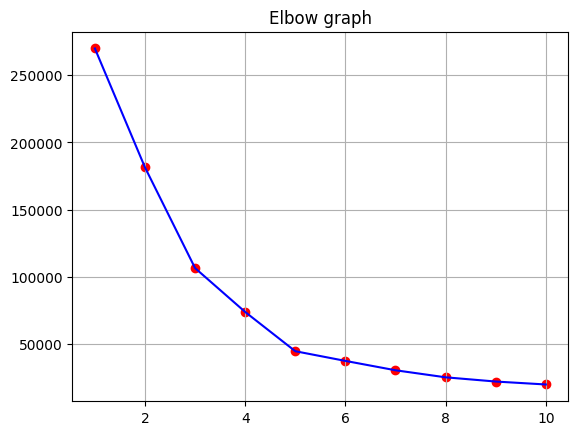

In [64]:
# plotting the graph
plt.title("Elbow graph")
plt.plot(range(1,11),wcss,color='b',markersize=5,linewidth=1.5)
plt.scatter(range(1,11),wcss,color='r')
plt.grid(True)
plt.show()

In [65]:
# best k value is 5
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)

In [66]:
# fitting the dataset
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [67]:
# cluster centres
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [68]:
# labelling each data points
Y = kmeans.fit_predict(X)

In [69]:
print(Y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [70]:
X[0],Y[0]

(array([15, 39]), 2)

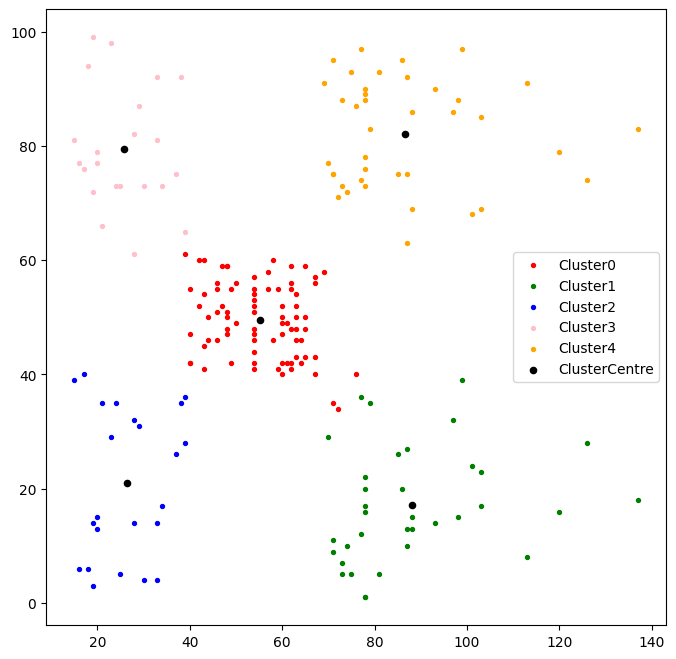

In [71]:
# visualisation of the clusters
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=8,c='r',label='Cluster0')
plt.scatter(X[Y==1,0],X[Y==1,1],s=8,c='g',label='Cluster1')
plt.scatter(X[Y==2,0],X[Y==2,1],s=8,c='b',label='Cluster2')
plt.scatter(X[Y==3,0],X[Y==3,1],s=8,c='pink',label='Cluster3')
plt.scatter(X[Y==4,0],X[Y==4,1],s=8,c='orange',label='Cluster4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=20,c='k',label='ClusterCentre')
plt.legend()
plt.show()